In [1]:
#importing packages
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

In [2]:
#setting directory path

os.chdir('U:\\final report\\with cheating variable')

In [40]:
#importing dataset

dt=pd.read_excel('LUAD-cheating.xlsx',index_col=0)

In [32]:
dt.head(3)

,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,GGACT,...,Number of Samples Per Patient,Specimen Second Longest Dimension,Tissue Source Site,Patient Smoking History Category,Vial number,Patient's Vital Status,Disease Free (Months),Overall Survival Status,Disease Free Status,Survival
HUG0_SYMBOL,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.2240,0.3832,...,1,0.9,5,4.0,0,1,0.00,1,0,0.00
TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.2260,-0.5346,...,1,0.8,5,3.0,0,1,50.03,1,0,50.03
TCGA-05-4250-01,-0.8531,-0.1379,-0.1805,-0.2629,-0.3317,-0.2317,-0.5528,-0.1476,-0.2508,0.6921,...,1,0.7,5,4.0,0,0,26.26,0,1,3.98


In [4]:
dt.shape  #getting the dimensions of data

(517, 14833)

In [44]:
#subsetting dataset to features and target values

x=dt.iloc[:,0:14831].values
y=dt.iloc[:,-1].values 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


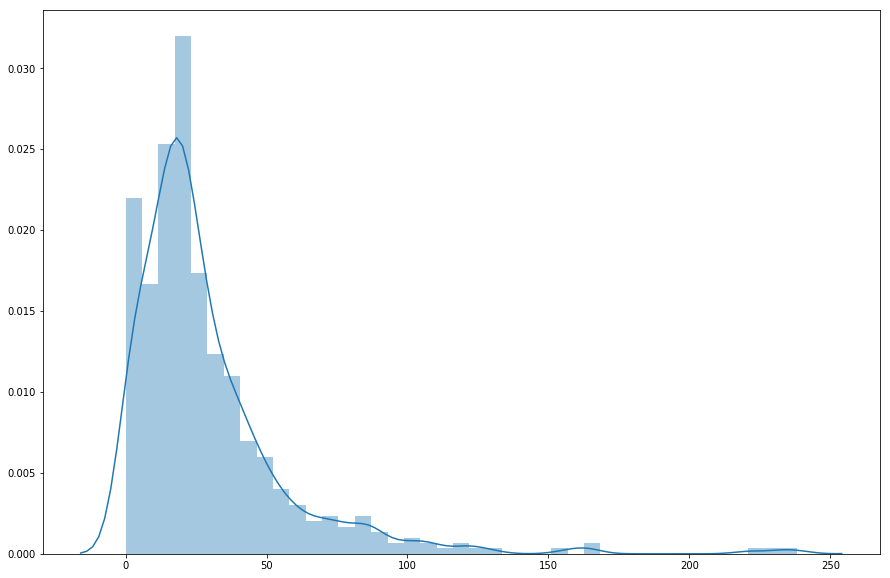

In [6]:
#plot distribution of data

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y)

In [45]:
#split data to train, test, validation split (80/20)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [46]:
#applyign linear regression model
lassoReg=Lasso(alpha=10,normalize=False)
lassoReg.fit(X_train, y_train) #training the algorithm

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
#predicting on validation split

y_predval = lassoReg.predict(X_val)

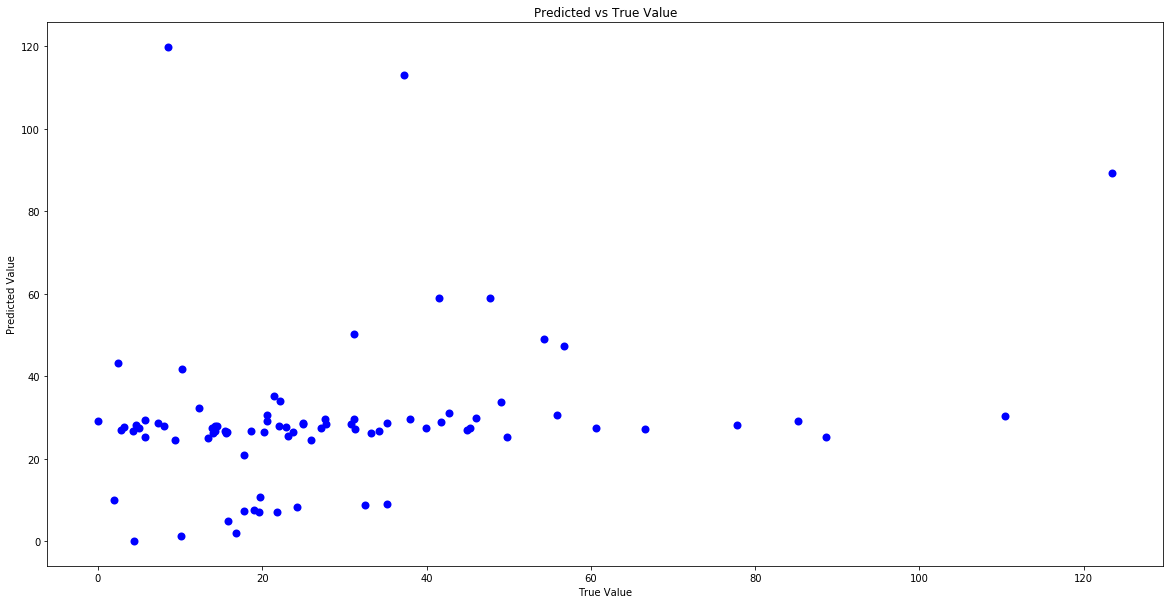

In [37]:
#True value ~ Predicted Value

plt.figure(figsize=(20,10))
plt.scatter(y_val, y_predval, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [48]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % lassoReg.score(X_val, y_val))

6.780899408252082
112.8091287618064
10.621164190511623
Variance score: 0.79


In [50]:
# KFOlD
estimator = lassoReg
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[-3.00246136  0.50484611  0.86496063  0.75107666  0.96559104  0.72178095
  0.81756292  0.71558014  0.65659524  0.2279059 ]
0.3223438227116145 1.1251541116073092


In [0]:
                     '''OPTIMISATION'''

In [0]:
# Hyper parameter optimization

tuned_parameters = {'alpha':[0.1,0.5,1.10,20,30,50,100],
                     'fit_intercept':[True,False],
                      ''
                     'max_iter':[None,1,2,5,10],
                     'random_state':[0,1,42],
                    'tol':[0.001,0.1,0.5]}
ridgeReg=Ridge()
grid=GridSearchCV(lassoReg,tuned_parameters,scoring='r2',verbose=1)    
grid.fit(X_train,y_train)
print(grid.best_estimator_)

In [0]:
#getting scores

y_predval=lassoReg.predict(X_val)
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % lassoReg.score(X_val, y_val))

11.25712237785593
237.98856481888106
15.426877999740617
Variance score: 0.74


In [23]:
# KFOlD
estimator = lassoReg
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[0.85769668 0.9364512  0.52848814 0.93350555 0.53986121 0.94696476
 0.95885523 0.90013181 0.87154999 0.85139827]
0.8324902836251489 0.15337126511467025


In [51]:
                                  '''APPYING MODEL ON TESTING DATA SET'''
lassoReg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lassoReg.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % lassoReg.score(X_test, y_test))


9.740463489395452
262.7182943179147
16.208587054950677
Variance score: 0.81


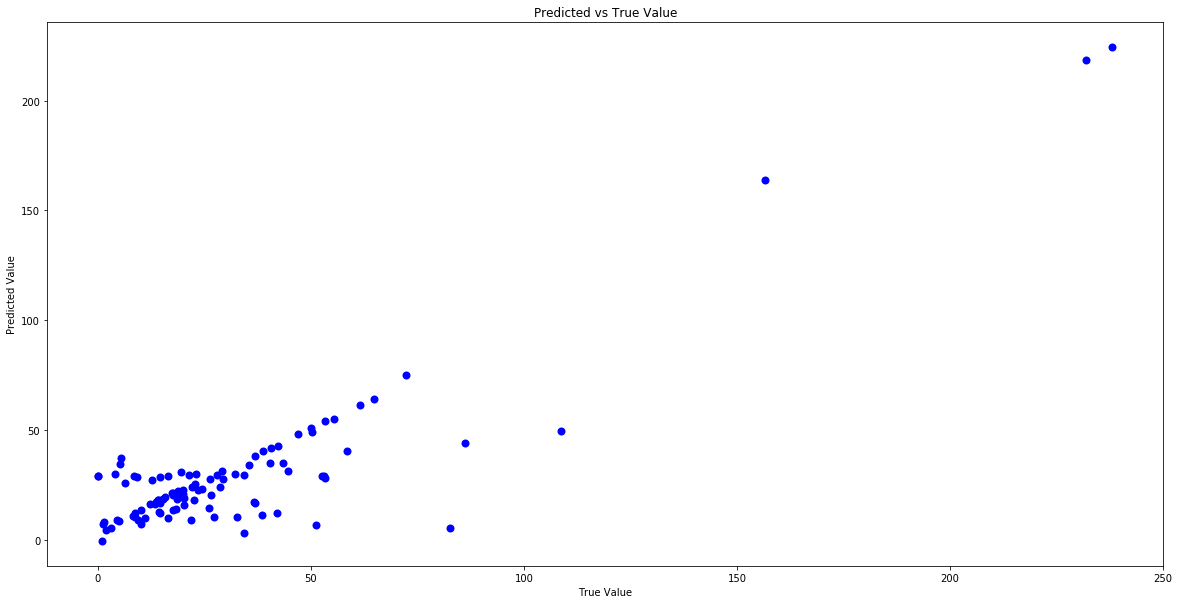

In [52]:
#True Value ~ Predicted Values

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()